<h1>Марекенговое исследование о посещении сайта Яндекс Афиши</h1>

Описание проекта
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов.<br>
<br>
Цели исследования изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.
- Выручка измеряется в условных единицах — у.е.

- [Обработка данных](#1)
- [Импорт библиотек](#import)
- [Изучение и обработка данных](#data)
- [Расчет метрик и постройка графиков](#metr)
- [Продуктовые метрики](#prod)
- [Расчет DAU, MAU, WAU](#DMW)
- [Количество посещений в день](#count)
- [Продолжительность пользовательской сессии](#session)
- [Расчет Retention Rate](#RR)
- [Метрики электронной коммерции](#e-c)
- [Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки](#buy)
- [Количество покупок на одного покупателя за 6 месяцев](#month-buy)
- [Cредний чек](#check)
- [Cредний LTV по когортам за 6 месяцев](#cogort)
- [Маркетинговые метрики](#mark)
- [Общая сумма расходов на маркетинг](#sum)
- [Cредний CAC на одного покупателя для всего проекта и для каждого источника трафика](#cac)
- [окупаемость ROMI](#romi)
- [Вывод](#v)

## Обработка данных
<a id="1"></a>

### Импорт библиотек
<a id="import"></a>

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Изучение и обработка данных<a id="data"></a>

In [2]:
visit = (pd.read_csv('/datasets/visits_log.csv',
                    dtype={'Device': 'category', 'Source Id' : 'int8'},
    parse_dates=['Start Ts', 'End Ts']))
order = (pd.read_csv('/datasets/orders_log.csv',
                    parse_dates=['Buy Ts']))
cost = pd.read_csv('/datasets/costs.csv', parse_dates =['dt'])

In [3]:
visit.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
115011,desktop,2017-06-22 12:29:00,5,2017-06-22 12:05:00,6960850490686617714
173461,desktop,2018-04-26 20:45:00,3,2018-04-26 20:42:00,3945202447532351785
55234,desktop,2017-10-26 23:00:00,5,2017-10-26 22:56:00,17026483229728000703
97663,desktop,2017-11-29 11:27:00,4,2017-11-29 11:21:00,2810340943247313310
261601,desktop,2017-06-29 17:44:00,5,2017-06-29 17:38:00,3223339340734103124
56306,desktop,2018-02-27 21:20:00,5,2018-02-27 21:20:00,6779132022574885017
285034,desktop,2018-02-14 12:02:00,1,2018-02-14 11:41:00,14965030714373758003
250655,touch,2017-08-02 13:53:00,4,2017-08-02 13:52:00,8594828596391790835
130740,desktop,2017-12-16 04:17:00,3,2017-12-16 04:16:00,9712751712790424102
240764,touch,2017-12-26 23:04:00,4,2017-12-26 23:01:00,10736688746859595930


* Device — категория устройства пользователя
* End Ts — дата и время окончания сессии
* Source Id — идентификатор источника перехода на сайт
* Start Ts — дата и время начала сессии
* Uid — уникальный идентификатор пользователя

In [4]:
#приведение названия столбцов к нижнему регистру
visit.columns = visit.columns.str.lower()

In [5]:
visit.rename(columns={'end ts':'end_ts','start ts':'start_ts','source id':'source_id'},inplace=True)

In [6]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int8
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int8(1), uint64(1)
memory usage: 8.9 MB


In [7]:
visit.describe()

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [8]:
visit[['end_ts','start_ts']].describe()

,end_ts,start_ts
count,359400,359400
unique,224760,224303
top,2017-11-24 16:51:00,2017-11-24 16:06:00
freq,23,19
first,2017-06-01 00:02:00,2017-06-01 00:01:00
last,2018-06-01 01:26:00,2018-05-31 23:59:00


In [9]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int8
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int8(1), uint64(1)
memory usage: 8.9 MB


In [10]:
#выведение 10 случаных строк
order.sample(10)

,Buy Ts,Revenue,Uid
24965,2017-12-19 20:37:00,4.28,10837340547074057589
25346,2017-12-22 08:13:00,1.22,7764446939034035835
41912,2018-03-25 21:57:00,3.67,17740344752865854009
50286,2018-05-31 17:57:00,11.00,1270467106067359891
44551,2018-04-18 18:19:00,2.20,9648593726298315086
29099,2018-01-12 14:20:00,15.58,76086143290625095
4544,2017-07-28 12:48:00,0.37,13468759200534989561
5934,2017-08-24 11:26:00,5.50,2871498722830732876
12966,2017-10-15 23:58:00,1.83,11386388625382695389
16238,2017-11-05 15:26:00,12.83,4428482928085636621


* Buy Ts — дата и время заказа
* Revenue — сумма заказа
* Uid — уникальный идентификатор пользователя,

In [11]:
#приведение название колонок к нижнему регистру
order.columns = order.columns.str.lower()

In [12]:
#переименование колонок
order.rename(columns={'buy ts':'buy_ts'},inplace=True)

In [13]:
order.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [14]:
order['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [15]:

#создание столбца с месяцем покупки
order['order_month'] = order['buy_ts'].astype('datetime64[M]')
#уберем данные за июнь 18
order = order.query('order_month != "2018-06-01"')

In [16]:
order['buy_ts'].describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

In [17]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 4 columns):
buy_ts         50414 non-null datetime64[ns]
revenue        50414 non-null float64
uid            50414 non-null uint64
order_month    50414 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.9 MB


In [18]:
#вывод 10 случайных строк таблицы
cost.sample(10)

,source_id,dt,costs
183,1,2017-12-01,55.10
1942,9,2017-10-05,21.15
1417,4,2018-04-27,207.30
883,3,2017-11-05,363.83
996,3,2018-02-26,423.43
874,3,2017-10-27,824.66
256,1,2018-02-12,91.64
1280,4,2017-12-09,367.51
2348,10,2017-11-17,36.07
846,3,2017-09-29,421.28


* source_id — идентификатор рекламного источника
* dt — дата проведения рекламной кампании
* costs — расходы на эту кампанию

In [19]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [20]:
#преобразование типа данных
cost['dt']= pd.to_datetime(cost['dt'])

In [21]:
cost.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [22]:
cost['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [23]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [24]:
#проверка на дубликаты
f'Дубликаты в таблице visit: {visit.duplicated().sum()},Дубликаты в таблице order: {order.duplicated().sum()},Дубликаты в таблице cost: {cost.duplicated().sum()}'

'Дубликаты в таблице visit: 0,Дубликаты в таблице order: 0,Дубликаты в таблице cost: 0'

## Расчет метрик и постройка графиков<a id="metr"></a>

### Продуктовые метрики <a id="prod"></a>

#### Расчет DAU, MAU, WAU<a id="DMW"></a>

In [25]:
#создание колонок года , месяца . недели , даты
visit['session_year'] = visit['start_ts'].dt.year
visit['session_month'] = visit['start_ts'].astype('datetime64[M]')
visit['session_week'] = visit['start_ts'].astype('datetime64[W]')
visit['session_date'] = visit['start_ts'].dt.date

In [26]:
visit.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


In [27]:
#подсчет среднего количества уникальных пользователей в день
dau_total = visit.groupby('session_date').agg({'uid':'nunique'}).mean()
dau_total

uid    907.991758
dtype: float64

In [28]:
#подсчет среднего количества уникальных пользователей в неделю
wau_total = visit.groupby(['session_week']).agg({'uid':'nunique'})['uid'].mean()
wau_total

5724.415094339623

In [29]:
# код ревьюера
display(visit.groupby(['session_year','session_week']).agg({'uid':'nunique'})['uid'].count())
visit.groupby(['session_week']).agg({'uid':'nunique'})['uid'].count()


54

53

In [30]:
#подсчет среднего количества уникальных пользователей в месяц
mau_total = visit.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()
mau_total

uid    23228.416667
dtype: float64

Среднее значение уникальных пользователей в день 907 польз., в неделю 5724 польз. , в месяц 23228 польз..

In [31]:
#функция для построения графиков
def graph(x = '' ,y='',z=''):
    if not x:
        (visit.groupby(y).agg({'uid':'nunique'}).reset_index()
        .plot(x=y,y='uid',figsize = (11,6),legend=False,grid=True,color='red'))
        plt.title('изменение количества уникальных пользователей по ' +  z)
        plt.xlabel('дата')
        plt.ylabel('уникальные пользоваели')
        plt.show()    
    else:
        (visit.groupby([x,y]).agg({'uid':'nunique'}).reset_index()
        .plot(x=y,y='uid',figsize = (11,6),legend=False,grid=True,color="green"))
        plt.title(z)
        plt.xlabel('дата')
        plt.ylabel('уникальные пользователи')
        plt.show()

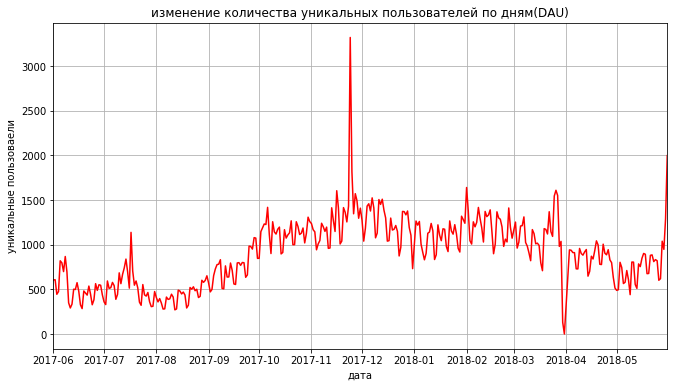

In [32]:
graph(y='session_date',z='дням(DAU)')

Наблюдается сильный всплеск пользователей в конце ноября 17 го года, что возможно было вызвано рекламной компанией.В конце ареля есть падение количества пользователей до 0, возможно был сбой на сайте.

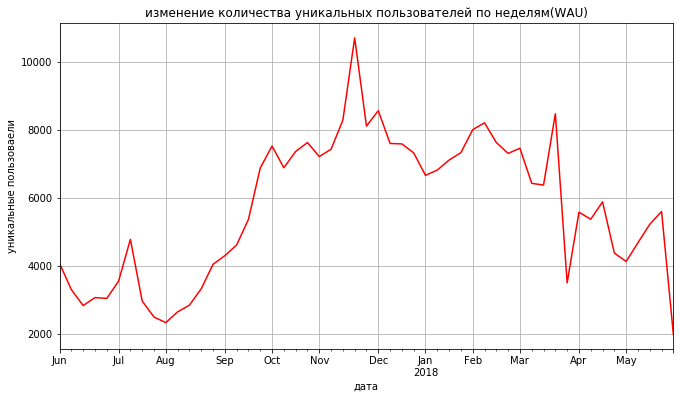

In [33]:
graph(y='session_week',z='неделям(WAU)')

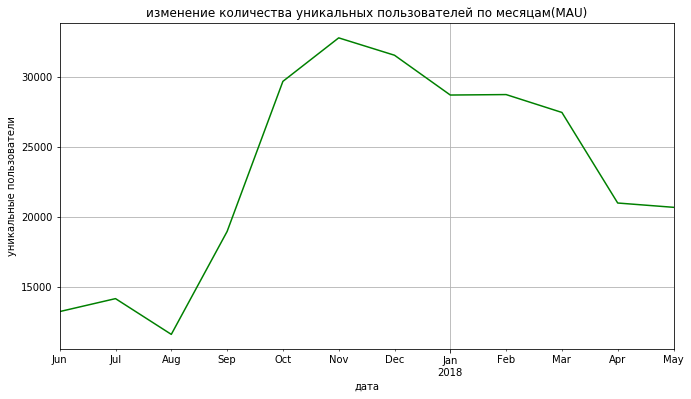

In [35]:
graph(x='session_year',y='session_month',z='изменение количества уникальных пользователей по месяцам(MAU)')

Изучив показатели посещения и построив графики можно заметить повышение количества новых пользователей с сентября по ноябрь. высокие показатели и постепенное снижение с ноября по март и далее снижение количества уникальных пользователей

Есть резкий скачок покупателей в конце ноября месяца, что скорее всего было обусловленно акцией "Черная пятница".

#### Количество посещений в день <a id="count"></a>

In [36]:
#выведем количество посещений в день
session_per_day = visit.groupby(['session_year','session_month','session_date']).agg({'uid':['count','nunique']})
session_per_day.columns = ['session','users']
session_per_day['session_per_user'] = session_per_day['session'] / session_per_day['users']
session_per_day.reset_index(inplace=True)
session_per_day['users'].describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: users, dtype: float64

In [37]:
visit.groupby('session_date').agg({'uid':'nunique'}).describe()

,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


In [38]:
#среднее посещение в день
session_per_day['session_per_user'].mean()

1.082169644003972

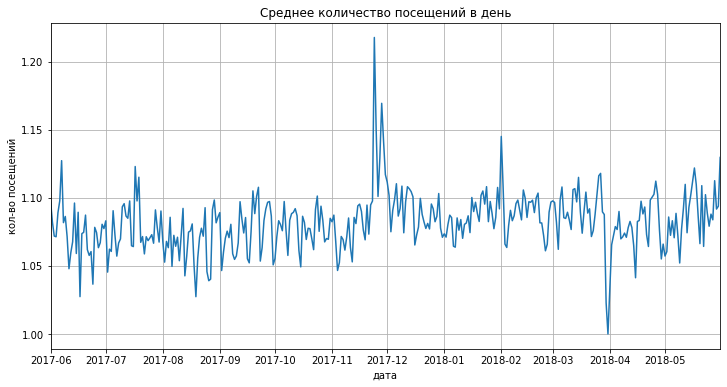

In [39]:
session_per_day.plot(x='session_date',y='session_per_user',grid=True,figsize=(12,6),legend=False)
plt.title('Среднее количество посещений в день')
plt.xlabel('дата')
plt.ylabel('кол-во посещений')
plt.show()

Пользователи редко заходят более 1 раза за день.В среднем показатель 1,08 раза. Наблюдаеся пик активности в конце ноября.И падение в конце апреля. данные аномиалии были заметны при рассмотрении метрики DAU раннее.

#### Продолжительность пользовательской сессии <a id="session"></a>

In [40]:
#создадим колонку с временем сессии
visit['session_sec'] = (visit['end_ts'] -visit['start_ts']).dt.seconds
visit.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0


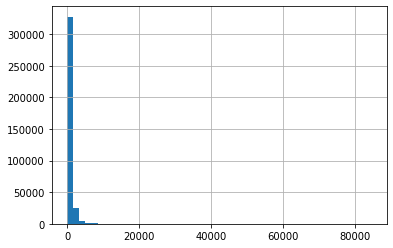

In [41]:
visit['session_sec'].hist(bins=50)

In [42]:
visit['session_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_sec, dtype: float64

In [43]:
#Наиболее частое время сессии
visit['session_sec'].mode()[0]

60

Средняя продолжительность пользовательской сессии 643 сек., но есть ряд очень больших значений, которые могут искажать значения. Медианое значение 300 секунд и самое часто люди сидят на сайте не более 60 секунд.

#### Расчет Retention Rate <a id="RR"></a>

In [44]:
#создадим таблицу клиентов с датой первого посещения
first_visit = visit.groupby(['uid'])['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [45]:
#группировка с основной таблицей
visit = visit.merge(first_visit,on='uid')
visit.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00


In [46]:
#выделение месяца
visit['first_visit_month'] = visit['first_visit'].astype('datetime64[M]')
visit['visit_month'] = visit['start_ts'].astype('datetime64[M]')
visit.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_sec,first_visit,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,2018-03-01


In [47]:
visit['lifetime'] = (visit['visit_month'] - visit['first_visit_month']) / np.timedelta64(1, 'M')
visit['lifetime'] = visit['lifetime'].round().astype('int')

In [48]:
#разделение клиентов на когорты
cohort_visit = visit.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
f_uid = cohort_visit[cohort_visit['lifetime'] == 0][['first_visit_month', 'uid']]
f_uid.columns = ['first_visit_month', 'f_uid']
f_uid.head()

,first_visit_month,f_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [49]:
#создание сводной таблицы
cohort_visit = cohort_visit.merge(f_uid)
cohort_visit['retention'] = cohort_visit['uid'] / cohort_visit['f_uid']
visit_retention_pivot = cohort_visit.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

visit_retention_pivot.mean() * 100

lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

In [50]:
#задание колонок
visit_retention_pivot.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [51]:
#средний Ratation Rate по месяцам
second_month = round(visit_retention_pivot['1'].mean()*100,2)
visit_retention_pivot.mean()*100

0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

In [52]:
f'Коэфициент удержания на 2й месяц "жизни когорты" {second_month} %'

'Коэфициент удержания на 2й месяц "жизни когорты" 6.52 %'

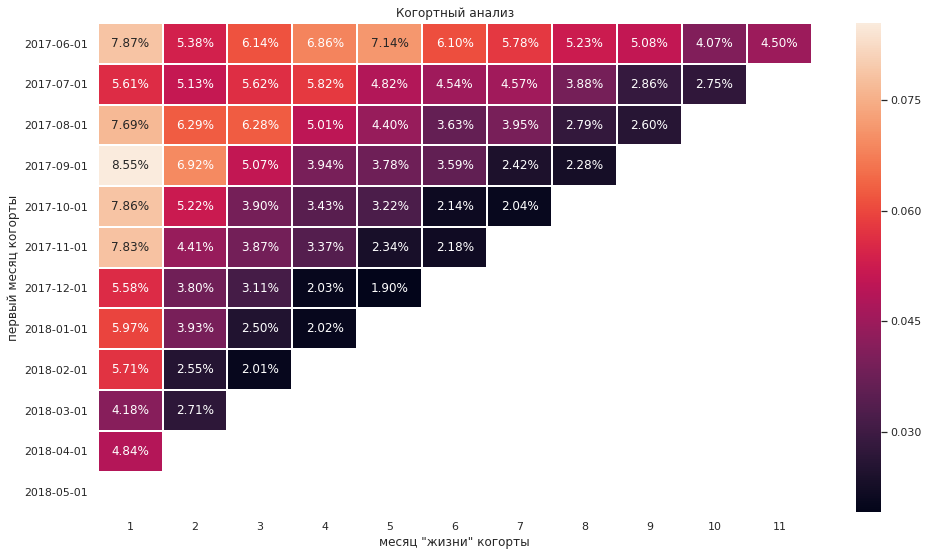

In [53]:
visit_retention_pivot = visit_retention_pivot[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']]
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ')
ax = sns.heatmap(visit_retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white')
ax.set_yticklabels(visit_retention_pivot.index.date)
plt.xlabel('месяц "жизни" когорты')
plt.ylabel('первый месяц когорты')
plt.show()

В целом коэфициент удрежания довольно низкий, но более высокий коэфициент в когортах до декабря месяца , далее идет снижение.

### Метрики электронной коммерции <a id="e-c"></a>

#### Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки <a id="buy"></a>

In [54]:
visit.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_sec,first_visit,first_visit_month,visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [55]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 14 columns):
device               359400 non-null category
end_ts               359400 non-null datetime64[ns]
source_id            359400 non-null int8
start_ts             359400 non-null datetime64[ns]
uid                  359400 non-null uint64
session_year         359400 non-null int64
session_month        359400 non-null datetime64[ns]
session_week         359400 non-null datetime64[ns]
session_date         359400 non-null object
session_sec          359400 non-null int64
first_visit          359400 non-null datetime64[ns]
first_visit_month    359400 non-null datetime64[ns]
visit_month          359400 non-null datetime64[ns]
lifetime             359400 non-null int64
dtypes: category(1), datetime64[ns](7), int64(3), int8(1), object(1), uint64(1)
memory usage: 36.3+ MB


In [56]:
order.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [57]:
#вреемя первого визита
first_visit = visit.groupby('uid')['start_ts'].min().reset_index()
first_visit.name = 'first_active_visit'
first_visit.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [58]:
#дата первой покупки
first_order = order.groupby('uid')['buy_ts'].min().reset_index()
first_order.name = 'first_order'
first_order.head()

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [59]:
#объединение таблиц
user_activity = pd.merge(first_order,first_visit,on='uid')
user_activity.head()

,uid,buy_ts,start_ts
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [60]:
#переименование столбцов
user_activity = user_activity.rename(columns=({'buy_ts':'first_order','start_ts':'first_visit'}))

In [61]:
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36522 entries, 0 to 36521
Data columns (total 3 columns):
uid            36522 non-null uint64
first_order    36522 non-null datetime64[ns]
first_visit    36522 non-null datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 1.1 MB


In [62]:
#минуты до первой покупки после регистрации
user_activity['to_buy']= (user_activity['first_order'] - user_activity['first_visit']) / np.timedelta64(1,'D')

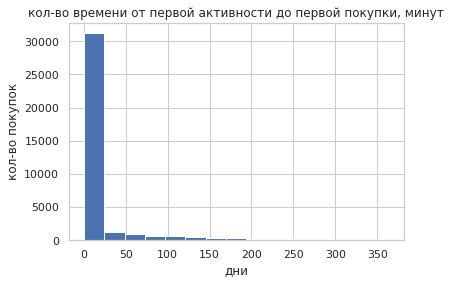

In [63]:
user_activity[['first_order','first_visit','to_buy']].hist(bins=15)
plt.title('кол-во времени от первой активности до первой покупки, минут')
plt.xlabel('дни')
plt.ylabel('кол-во покупок')
plt.show()

In [64]:
user_activity['to_buy'].describe()

count    36522.000000
mean        16.903363
std         47.073322
min          0.000000
25%          0.002778
50%          0.011111
75%          2.012153
max        363.294444
Name: to_buy, dtype: float64

In [65]:
user_activity['to_buy'].mode()[0]

0.0006944444444444445

Обычно проходит мало времени от регистрации до совершения покупки. Среднее значение 16 дней  . Медианое значение 0 дней , по сути большинство клиентов соершают покупку сразу.

#### Количество покупок на одного покупателя за 6 месяцев <a id="month-buy"></a>

In [66]:
first_order

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36517,18445147675727495770,2017-11-24 09:03:00
36518,18445407535914413204,2017-09-22 23:55:00
36519,18445601152732270159,2018-03-26 22:54:00
36520,18446156210226471712,2018-02-18 19:34:00


In [67]:
#месяц 1й покупки
first_order['buy_ts'] = first_order['buy_ts'].astype('datetime64[M]')

In [68]:
#переименование столбцов
first_order.columns = ['uid','first_order_month']

In [69]:
#группировка по месяцу 1 покупки
cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

In [70]:
#переименование колонок
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [71]:
#объединение таблиц
orders_first_month = pd.merge(order, first_order, on ='uid')

In [72]:
#разделение на когорты
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'uid':'count'}).reset_index()

In [73]:
cohorts

,first_order_month,order_month,uid
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
73,2018-03-01,2018-04-01,178
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195


In [74]:
#переименование столбцов
cohorts = cohorts.rename(columns={'uid':'count_orders'})

In [75]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')# объедините cohorts и cohort_sizes
report.head()

,first_order_month,n_buyers,order_month,count_orders
0,2017-06-01,2023,2017-06-01,2354
1,2017-06-01,2023,2017-07-01,177
2,2017-06-01,2023,2017-08-01,174
3,2017-06-01,2023,2017-09-01,226
4,2017-06-01,2023,2017-10-01,292


In [76]:
# расчитываем лайфтайм
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
# считаем среднее число покупок
report['mean_orders'] = report['count_orders'] / report['n_buyers']

In [77]:
report

,first_order_month,n_buyers,order_month,count_orders,age,mean_orders
0,2017-06-01,2023,2017-06-01,2354,0,1.163618
1,2017-06-01,2023,2017-07-01,177,1,0.087494
2,2017-06-01,2023,2017-08-01,174,2,0.086011
3,2017-06-01,2023,2017-09-01,226,3,0.111715
4,2017-06-01,2023,2017-10-01,292,4,0.144340
...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,178,1,0.050382
74,2018-03-01,3533,2018-05-01,176,2,0.049816
75,2018-04-01,2276,2018-04-01,2495,0,1.096221
76,2018-04-01,2276,2018-05-01,195,1,0.085677


In [78]:
result = report.pivot_table(index='first_order_month',columns= 'age',values='mean_orders',aggfunc='mean')
result = result.cumsum(axis=1)
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
result.columns = ['0','1','2','3','4','5','6','7','8','9','10','11']

In [80]:
#среднее значение за 6 месяцев
result['5'].mean()

1.4341911542792218

Исходя из полученных данных, можно сделать вывод что покупки клиенты 1й когорте производят чаще. В среднем клиент совершил 2 покупки уже к 8 месяцу жизни когорты. Среднее количество покупок на 1 клиента через 6 месяцев -  1,43.

#### Cредний чек <a id="check"></a>

In [81]:
order

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-01
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01


In [82]:
#распределение дохода с 1 клиента по месяцам
revenue_per_month = (
    order.groupby('order_month').agg({'revenue' : 'sum', 'buy_ts' : 'count'})
    .reset_index().rename(columns={'buy_ts' : 'n_orders'})
)
revenue_per_month['aov'] = revenue_per_month['revenue'] / revenue_per_month['n_orders']
revenue_per_month['order_month'] = revenue_per_month['order_month'].dt.strftime('%Y-%m')
revenue_per_month

,order_month,revenue,n_orders,aov
0,2017-06,9557.49,2354,4.060106
1,2017-07,12539.47,2363,5.306589
2,2017-08,8758.78,1807,4.847139
3,2017-09,18345.51,3387,5.416448
4,2017-10,27987.70,5679,4.928280
5,2017-11,27069.93,5659,4.783518
6,2017-12,36388.60,6218,5.852139
7,2018-01,19417.13,4721,4.112927
8,2018-02,25560.54,5281,4.840095
9,2018-03,28834.59,5326,5.413930


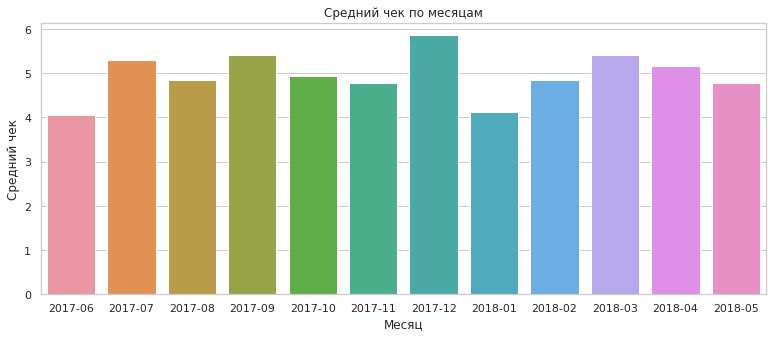

In [83]:
bar,ax = plt.subplots(figsize=(13,5))
ax= sns.barplot(data=revenue_per_month,x='order_month',y='aov')
ax.set_title('Средний чек по месяцам')
ax.set_ylabel('Средний чек')
ax.set_xlabel('Месяц')
plt.show()

В основном средний чек распределен от 4 до 6 у.е. Явной сезоности не обнаружено , самый низкий средний чек в июне 18го года , амый высокий в декабре 17го года.

####  Cредний LTV по когортам за 6 месяцев <a id="cogort"></a>

In [84]:
orders_first_month.head() # Таблица покупателей выведеная ранее

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [85]:
# Создадим таблицу с количеством покупателей в когорте
cohort_buyers_sizes = orders_first_month.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_buyers_sizes.columns = ['first_order_month', 'n_buyers']
cohort_buyers_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [86]:
# Создадим таблицу с группировкой по когортам и месяцу покупке, аргументом передадим сумму выручки

b_cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
b_cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [87]:
# Соеденим 2 полученных таблицы
report = pd.merge(cohort_buyers_sizes, b_cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [88]:
margin_rate = 1 # маржинальность 100%

In [89]:
# Рассчитаем валовую прибыль, возраст когорты и ltv
report['gp'] = report['revenue']  * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') 
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06,2023,2017-10-01,2068.58,2068.58,4,1.022531


In [90]:
ltv = (report.pivot_table(
        index='first_order_month',
        columns= 'age',
        values = 'ltv',
        aggfunc='mean').cumsum(axis=1).round(2))

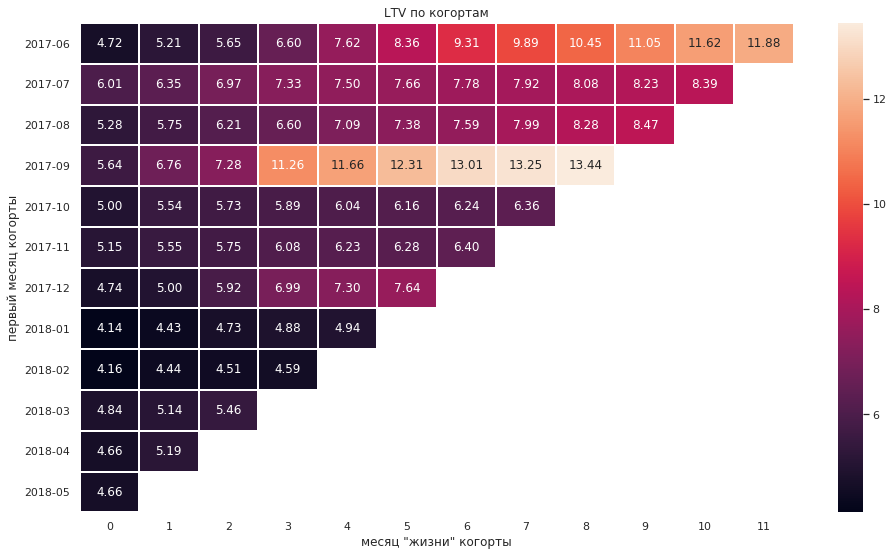

In [91]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('LTV по когортам')
ax = sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, linecolor='white')
plt.xlabel('месяц "жизни" когорты')
plt.ylabel('первый месяц когорты')
plt.show()

In [92]:
output_ltv =ltv.loc['2017-05-01':'2017-11-01']#уберем когорты прожившие меньше 6 месяцев
output_ltv = output_ltv[[0,1,2,3,4,5]]
output_ltv['mean'] = output_ltv.mean(axis=1).round(2)
output_ltv

age,0,1,2,3,4,5,mean
first_order_month,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,6.36
2017-07,6.01,6.35,6.97,7.33,7.50,7.66,6.97
2017-08,5.28,5.75,6.21,6.60,7.09,7.38,6.39
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,9.15
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,5.73
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,5.84


Средний LTV за 6 месяцев

In [93]:
round(output_ltv[5].mean(),2)

8.02

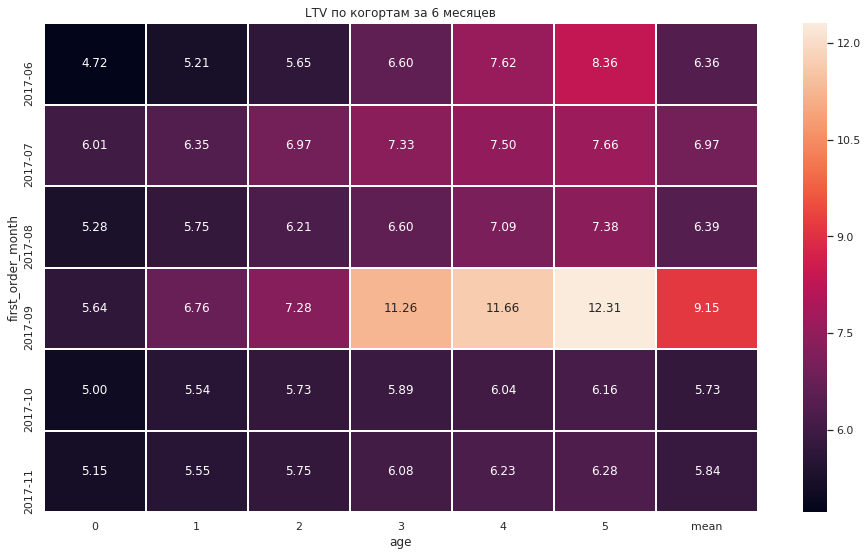

In [94]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('LTV')
ax = sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='white')
plt.title('LTV по когортам за 6 месяцев')
plt.show()

Рост показателя очень хороший в 1й когорте , также выделяются клиенты из сентябрьской когорты, за 6 месяцев жизни когорты видно выский темп роста метрики и высокий средний LTV.

### Маркетинговые метрики <a id="mark"></a>

#### Общая сумма расходов на маркетинг <a id="sum"></a>

In [95]:
sum_costs = cost['costs'].sum()
f'Всего потратили {sum_costs}'

'Всего потратили 329131.62'

In [96]:
#затраты исходя из источника
source_group = cost.groupby('source_id')['costs'].sum().reset_index().sort_values('costs',ascending=False)
source_group

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


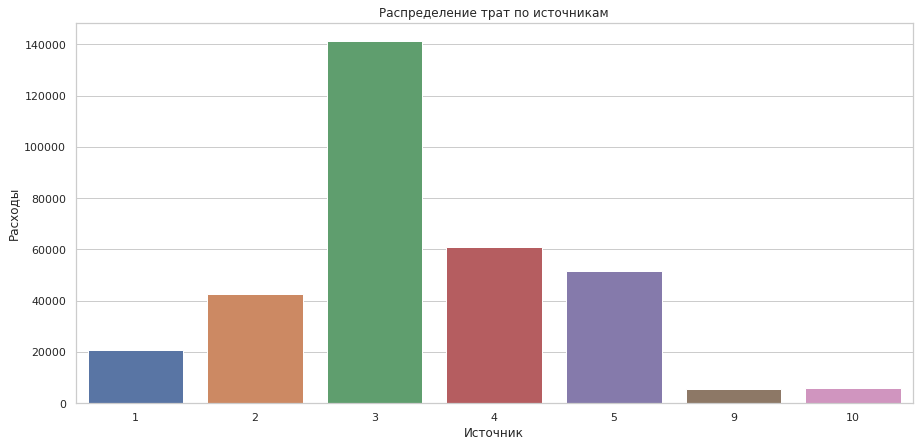

In [97]:
plt.figure(figsize = (15, 7))
ax = sns.barplot(data=source_group, x="source_id", y="costs")
plt.title('Распределение трат по источникам')
ax.set_xlabel('Источник')
ax.set_ylabel('Расходы')
plt.show()

Наиболее высокие затраты у 3го источника, стоит обратить пристальное внимание на эффективность данных затрат.

In [98]:
cost['cost_month'] = cost['dt'].astype('datetime64[M]').dt.date

In [99]:
source_by_month = cost.groupby(['cost_month','source_id']).agg({'costs':'sum'}).reset_index()
source_by_month.query('source_id == 1')

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
7,2017-07-01,1,1072.88
14,2017-08-01,1,951.81
21,2017-09-01,1,1502.01
28,2017-10-01,1,2315.75
35,2017-11-01,1,2445.16
42,2017-12-01,1,2341.20
49,2018-01-01,1,2186.18
56,2018-02-01,1,2204.48
63,2018-03-01,1,1893.09


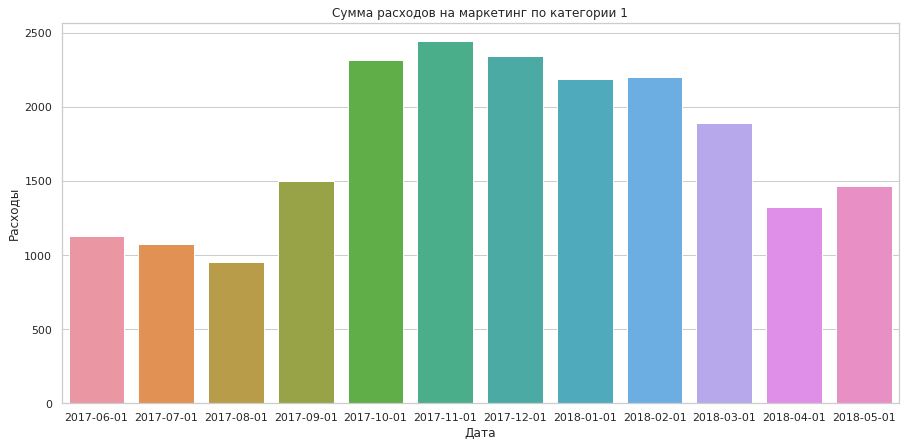

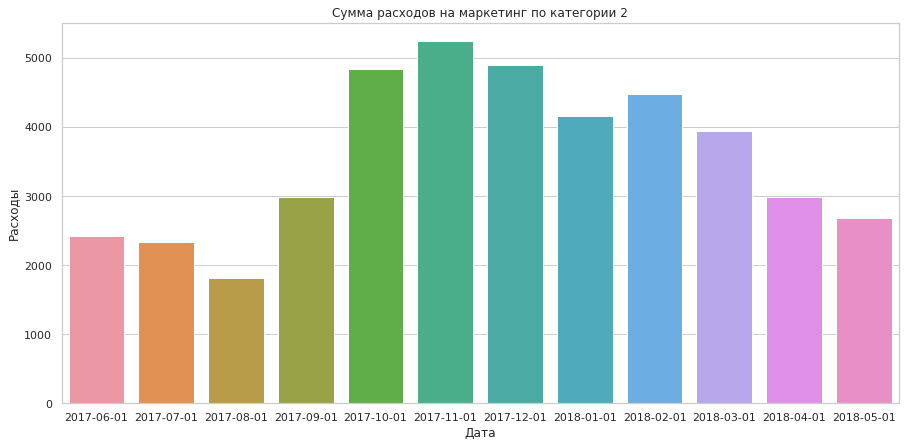

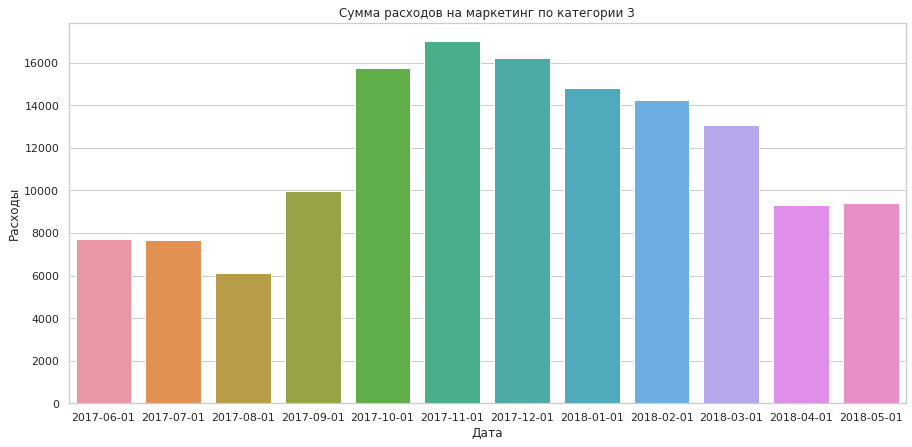

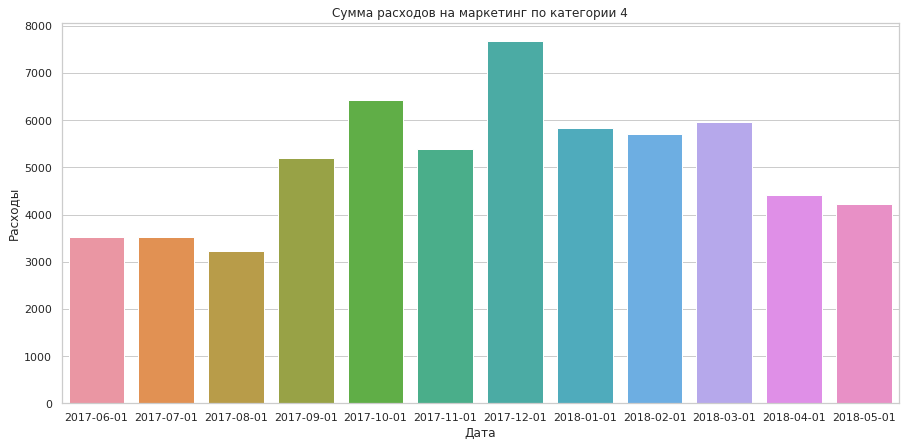

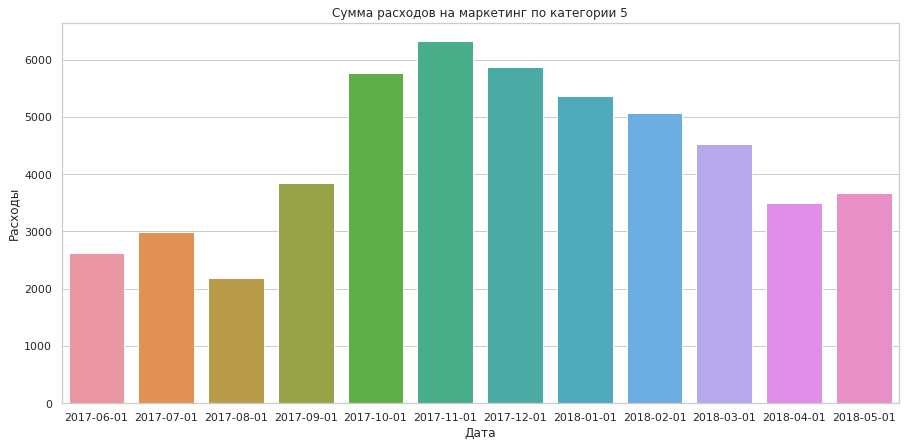

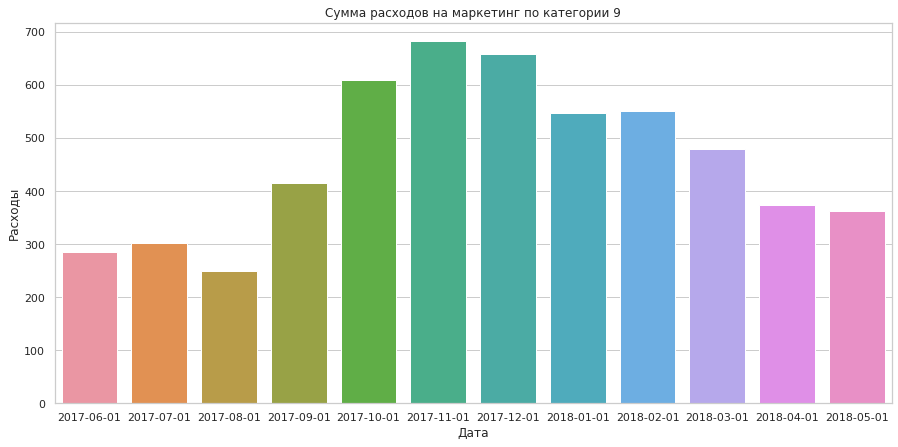

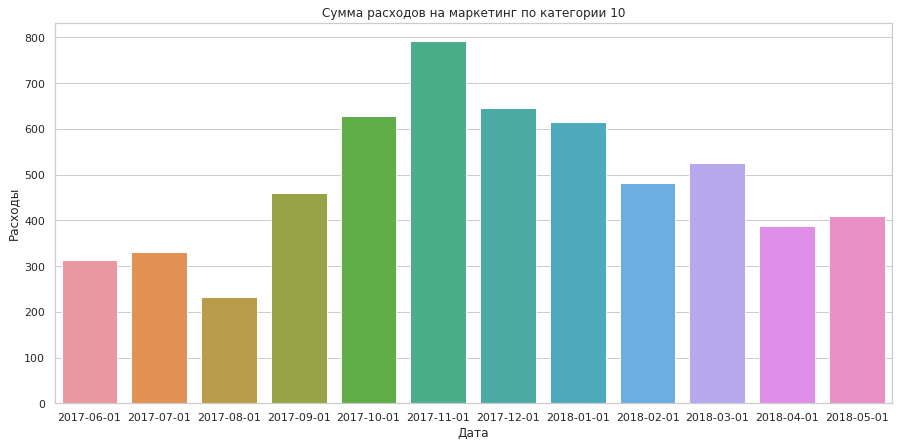

In [100]:
#распределение затрат по месяцам
cost_by_month = cost.groupby('cost_month')['costs'].sum().reset_index()
for i in source_by_month['source_id'].unique():
    plt.figure(figsize = (15, 7))
    ax = sns.barplot(data=source_by_month.query('source_id == @i'), x="cost_month", y="costs")
    plt.title('Сумма расходов на маркетинг по категории {}'.format(i))
    ax.set_xlabel('Дата')
    ax.set_ylabel('Расходы')
    plt.show()

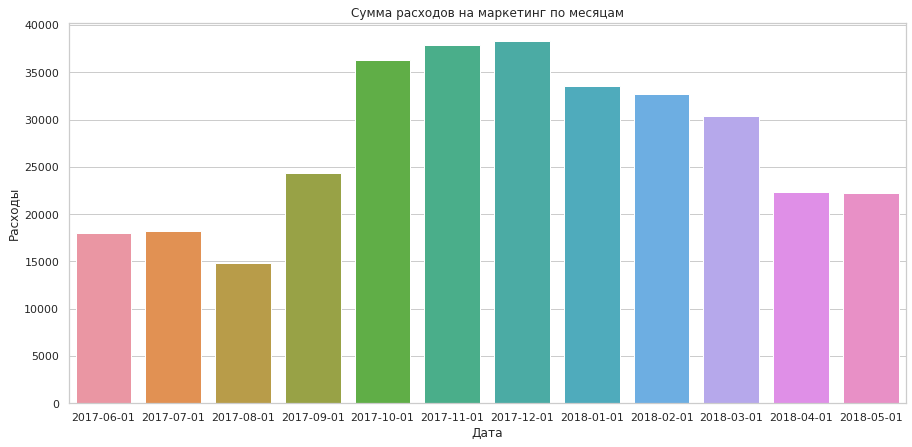

In [101]:
plt.figure(figsize = (15, 7))
ax = sns.barplot(data=cost_by_month, x="cost_month", y="costs")
plt.title('Сумма расходов на маркетинг по месяцам')
ax.set_xlabel('Дата')
ax.set_ylabel('Расходы')
plt.show()

Исходя из графика видим сильное повышение расходов на маркетинг с октября по январь месяц , далее постепенное снижение.

####  Cредний CAC на одного покупателя для всего проекта и для каждого источника трафика <a id="cac"></a>

In [102]:
visits_by_source = visit.query('start_ts == first_visit')
customers_by_source = (order.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'})

In [104]:
customers_by_source.reset_index()

,source_id,customers
0,1,2899
1,2,3506
2,3,10473
3,4,10295
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [105]:
costs_by_source = cost.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [106]:
cac = customers_by_source.join(costs_by_source).reset_index()
cac

,source_id,customers,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10295,61073.60
4,5,6931,51757.10
5,7,1,NaN
6,9,1088,5517.49
7,10,1329,5822.49


In [107]:
cac = cac.fillna(0)
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,source_id,customers,costs,cac
2,3,10473,141321.63,13.493901
1,2,3506,42806.04,12.209367
4,5,6931,51757.10,7.467479
0,1,2899,20833.27,7.186364
3,4,10295,61073.60,5.932356
6,9,1088,5517.49,5.071222
7,10,1329,5822.49,4.381106
5,7,1,0.00,0.000000


In [108]:
mean_cac = (cac['costs'] / cac['customers']).mean().round(2)
f'Средний показатель CAC на одного покупателя для всего проекта составил {mean_cac} $'

'Средний показатель CAC на одного покупателя для всего проекта составил 6.97 $'

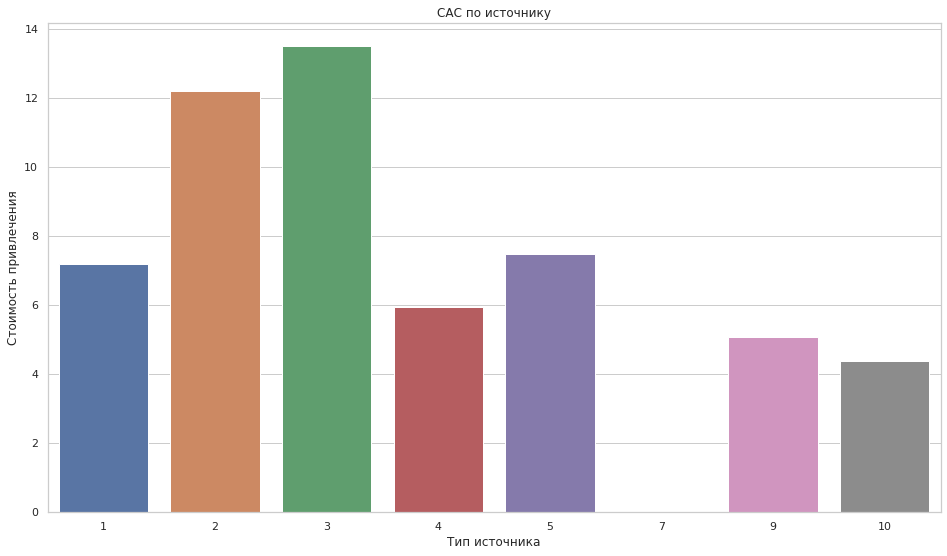

In [109]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC по источнику')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

Наиболее высока стоимость привлечения клиента это вложения во 2 и 3 источник рекламы. В 7 источник не вкладывали средства и был привлечен только 1 клиент.

#### окупаемость ROMI  <a id="romi"></a>

In [110]:
first_source = visit.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first', 'start_ts': 'first'})

In [111]:
first_source.head()

,source_id,start_ts
uid,,
11863502262781,3,2018-03-01 17:27:00
49537067089222,2,2018-02-06 15:55:00
297729379853735,3,2017-06-07 18:47:00
313578113262317,2,2017-09-18 22:49:00
325320750514679,5,2017-09-30 14:29:00


In [112]:
def romi_graph(source_id):
    source = source_id
    #выведем юзеров с разделением по источникам
    users = first_source.query('source_id == @source').index.values
    source_orders = orders_first_month.query('uid in @users')
    #вычислим общую сумму заказов по месяцам
    cohort_sizes = source_orders.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
    cohort_sizes = cohort_sizes.rename(columns={'uid':'n_buyers'})
    #вычислим сумму заказов по месяцам
    cohorts = source_orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
    cohorts = cohorts.merge(cohort_sizes,on='first_order_month')
    #маржинальность 100%
    margin_rate=1
    #вычислим валовую прибыль когорт за месяц , возраст когорт и ltv
    cohorts['gp'] = cohorts['revenue']  * margin_rate
    cohorts['age'] = (cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')
    cohorts['age'] = cohorts['age'].round().astype('int')
    cohorts['first_order_month'] = cohorts['first_order_month'].dt.strftime('%Y-%m') 
    cohorts['ltv'] = cohorts['gp'] / cohorts['n_buyers']
    #сводная таблица с накопительными значениями ltv
    cohorts_pivot = cohorts.pivot_table(index='first_order_month',columns='age',values='ltv',aggfunc='mean').cumsum(axis=1)
    #сохраним затраты только по нужному источнику
    source_cost = cost.query('source_id == @source')
    #затраты по месяцам
    cost_cohorts= source_cost.groupby('cost_month').agg({'costs':'sum'})
    #объеденим 2 таблицы
    cost_cohorts = cost_cohorts.join(cohort_sizes.set_index('first_order_month'))
    cost_cohorts['cac'] = cost_cohorts['costs'] / cost_cohorts['n_buyers']
    
    romi = cohorts_pivot.div(cost_cohorts['cac'],axis = 0)
    romi['mean'] = romi.mean(axis=1)
    
    sns.set(style = 'whitegrid')
    plt.figure(figsize = (16, 9))
    ax = sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='white')
    plt.title('ROMI по источнику {}'.format(source))
    plt.xlabel('Возраст когорты')
    plt.ylabel('Когорты')
    plt.show()
    
    print('Средний ROMI для всех когорт по {} источнику  - '.format(source), romi['mean'].mean().round(2))
    print('Средний ROMI для всех когорт по {} источнику за пол года - '.format(source), round(romi.mean(axis=0)[5],2))

    

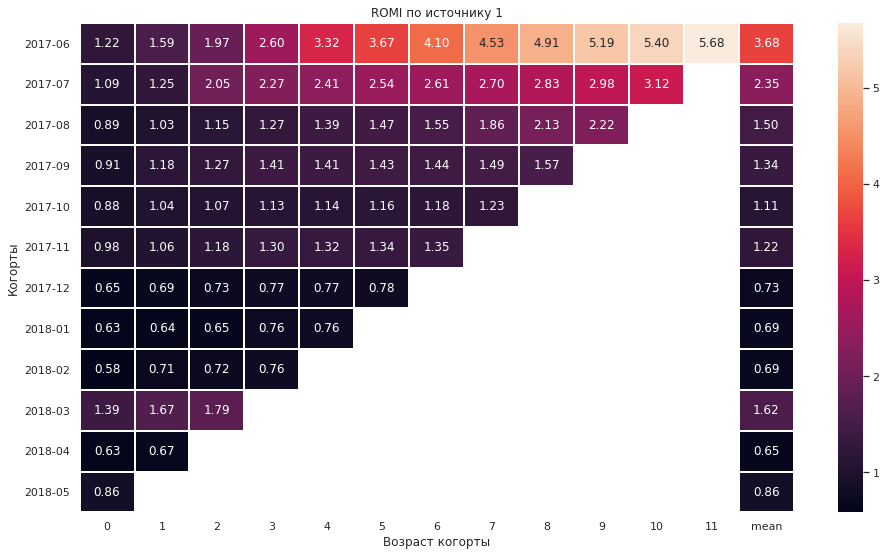

Средний ROMI для всех когорт по 1 источнику  -  1.37
Средний ROMI для всех когорт по 1 источнику за пол года -  1.77


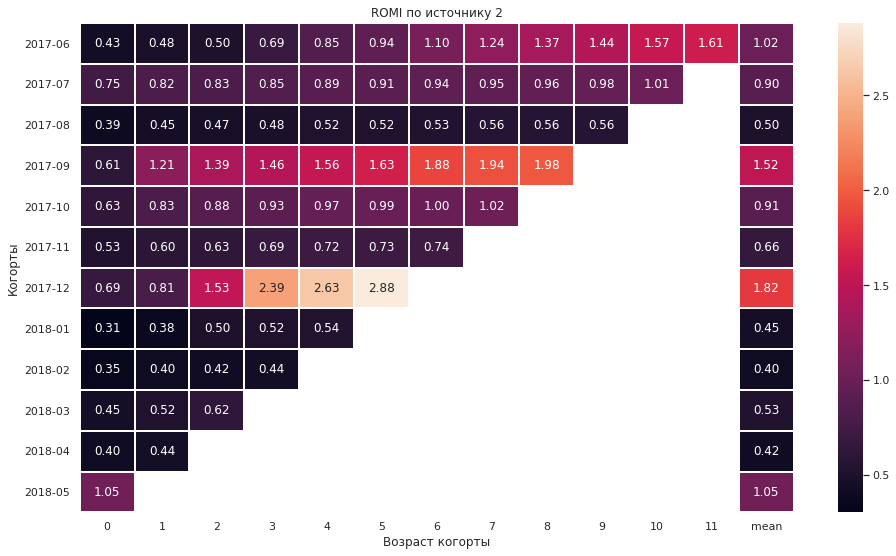

Средний ROMI для всех когорт по 2 источнику  -  0.85
Средний ROMI для всех когорт по 2 источнику за пол года -  1.23


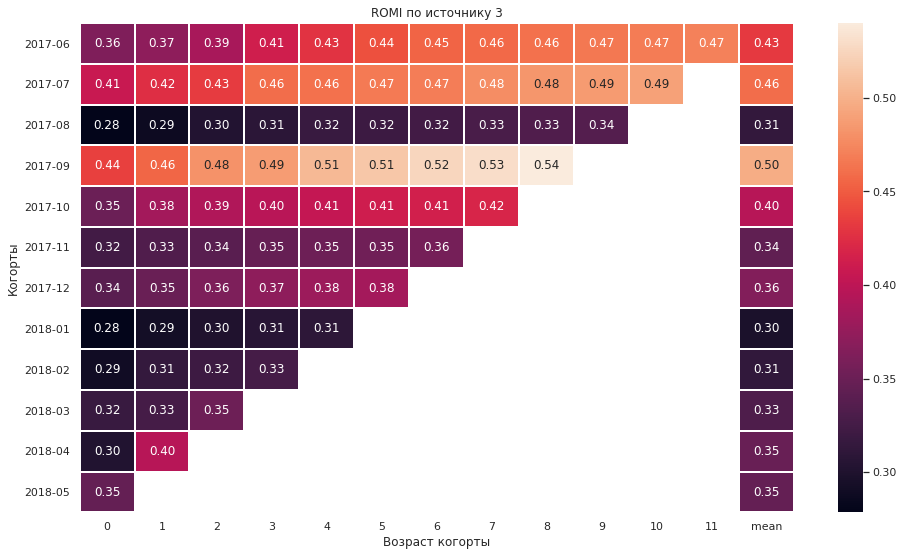

Средний ROMI для всех когорт по 3 источнику  -  0.37
Средний ROMI для всех когорт по 3 источнику за пол года -  0.41


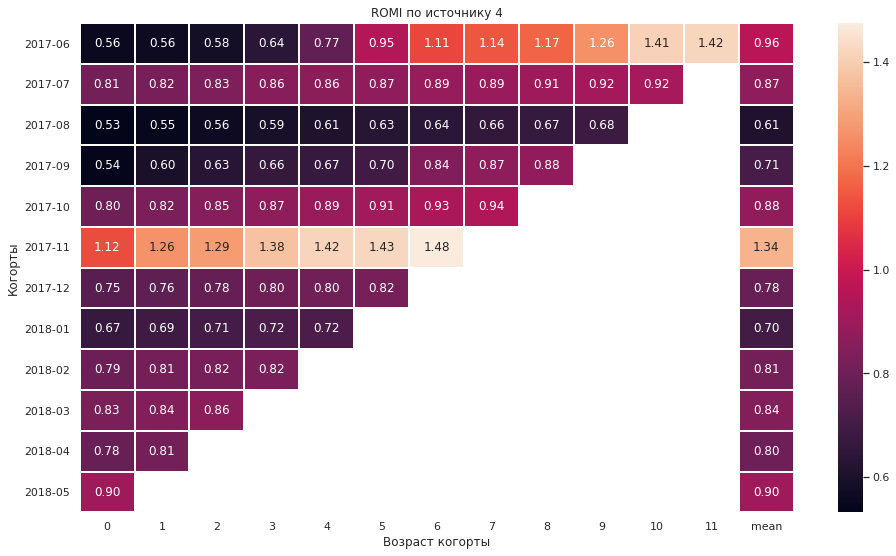

Средний ROMI для всех когорт по 4 источнику  -  0.85
Средний ROMI для всех когорт по 4 источнику за пол года -  0.9


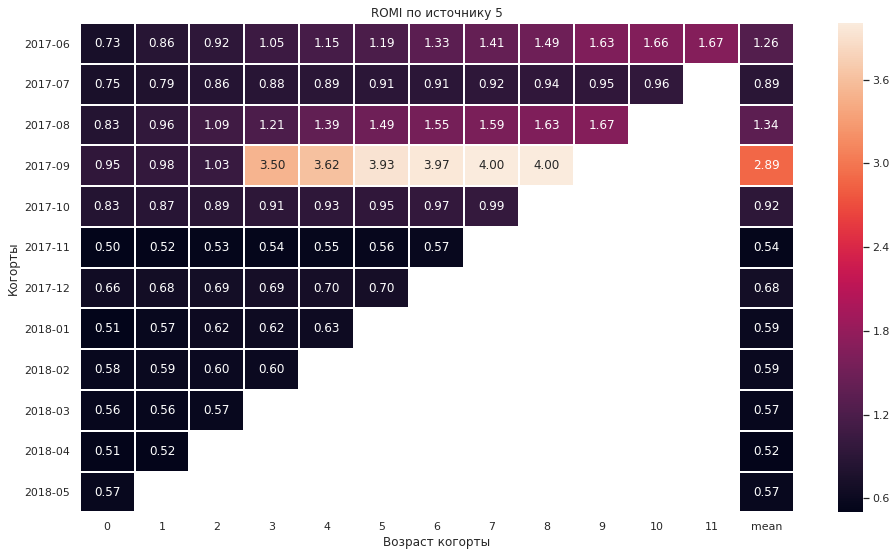

Средний ROMI для всех когорт по 5 источнику  -  0.95
Средний ROMI для всех когорт по 5 источнику за пол года -  1.39


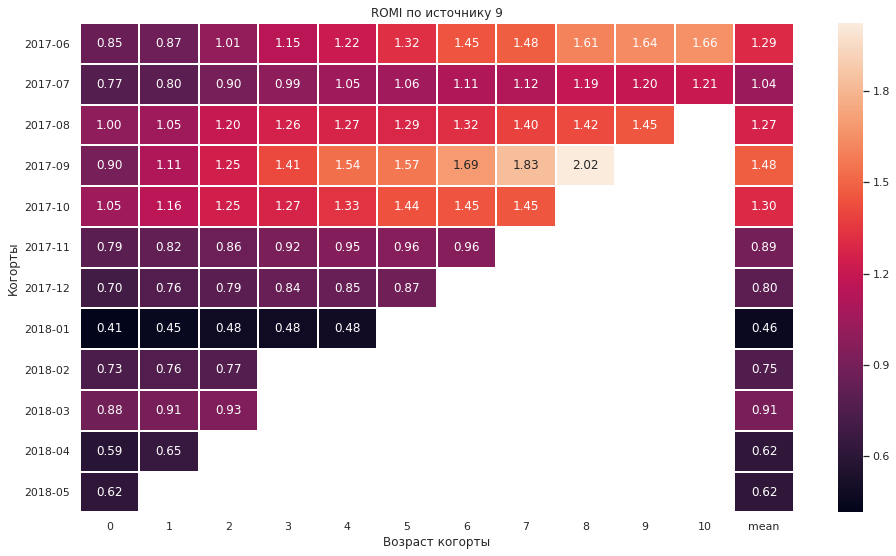

Средний ROMI для всех когорт по 9 источнику  -  0.95
Средний ROMI для всех когорт по 9 источнику за пол года -  1.22


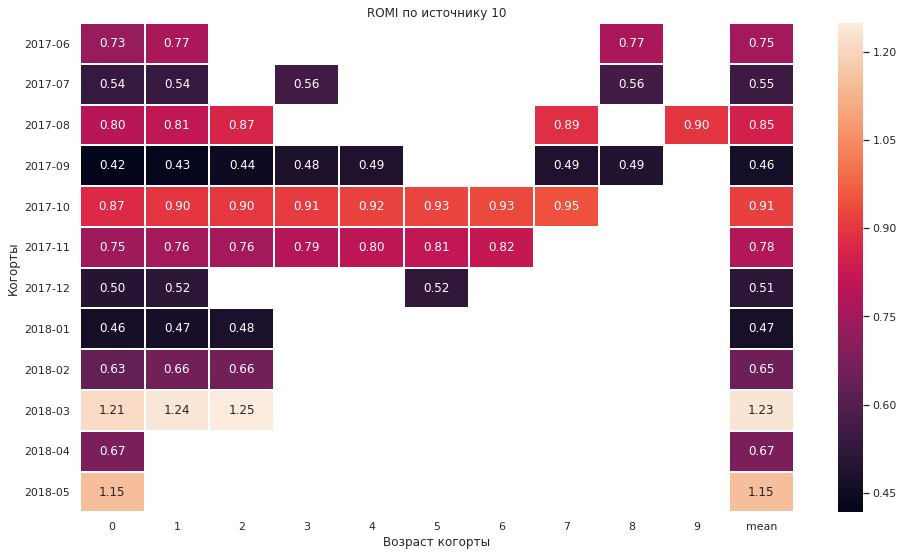

Средний ROMI для всех когорт по 10 источнику  -  0.75
Средний ROMI для всех когорт по 10 источнику за пол года -  0.75


In [113]:
for source_list in [1, 2, 3, 4, 5, 9, 10]:
    romi_graph(source_list)

# Вывод <a id="v"></a>

Проведя исследование можно сделать следующие выводы:
- Повышение количества новых пользователей с сентября по ноябрь. высокие показатели и постепенное снижение с ноября по март и далее снижение количества уникальных пользователей. Что было вызвано повышением вложения в маркетинг
- Пользователи редко заходят более 1 раза за день
- Продолжительность пользовательской сессии невысокая, есть много выбросов, поэтому лучшее рассматривать медианое значение, медиана 300 секунд.
- В целом коэфициент удрежания довольно низкий, но более высокий коэфициент в когортах до декабря месяца , далее идет снижение.
- Обычно проходит мало времени от регистрации до совершения покупки. Среднее значение 16 дней . Медианое значение 0 дней , по сути большинство клиентов соершают покупку сразу.
- В основном средний чек распределен от 4 до 6 у.е. Явной сезоности не обнаружено , самый низкий средний чек в июне 18го года , амый высокий в декабре 17го года.
- Увеличение расходов на маркетинг с ноября по март увеличили прибыль
<br>
<br>
Эффективность затрат на рекламу:<br>
Стоит обратить, что большие вложения в 3 источник неэффективны, хотя в источник вкладываются очень большие средства, в течении 6 месяцев окупаемость всего 39%. Также стоит отказаться от 10 источника , окупаемость 75%. По источнику 5 снизилась окупаемость с ноябрьской когорты. Стоит обратить внимание на различия в сезоности окупаемости различных источников . Стоит обратить внимание на источник 4 он близок к окупаемости, возможно можно найти баланс вложения в данный источник.